In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# file-handling stuff for user, options abound! I like Tables and Pandas DataFrames
import pandas as pd
from astropy.table import Table
from astropy import units as u

# import kosmos... if we do it right this should be the only other thing to import someday!
import sys

sys.path.insert(0, 'C:/Users/josue/kosmos')

import kosmos
DISPLAY = True


In [2]:
kosmos.__version__

'0.1'

## 1.Bias

In [16]:
dir = 'C:/Users/josue/!AstroPy/Research/Data/07102022/'
dir_2 = 'C:/Users/josue/!AstroPy/Research/Data/07072022/'
biasfiles_i = pd.read_table(dir_2 + 'bias_07.txt', names=['impath'])
biasfiles = dir_2 + biasfiles_i['impath'].values
biasfiles


array(['C:/Users/josue/!AstroPy/Research/Data/07072022/bias_01.fits',
       'C:/Users/josue/!AstroPy/Research/Data/07072022/bias_02_001.fits',
       'C:/Users/josue/!AstroPy/Research/Data/07072022/bias_02_002.fits'],
      dtype=object)

(512, 512)


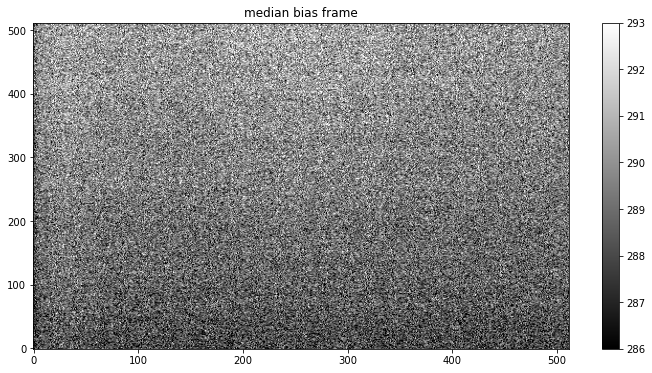

In [17]:
bias = kosmos.biascombine(biasfiles) 
print(bias.shape)

if DISPLAY:
    plt.figure(figsize=(12,6))
    plt.imshow(bias, origin='lower', aspect='auto', cmap=plt.cm.gray)
    plt.title('median bias frame')
    plt.clim(np.percentile(bias, (5, 98)))
    cb = plt.colorbar()

## 2.Flats

In [18]:
# flats in the r filter
flatfiles_i = pd.read_table(dir + 'flats_10R.txt', names=['impath'])
flatfiles = dir + flatfiles_i['impath'].values
flatfiles

array(['C:/Users/josue/!AstroPy/Research/Data/07102022/domeflat_20s_r_0.fits',
       'C:/Users/josue/!AstroPy/Research/Data/07102022/domeflat_20s_r_01.fits',
       'C:/Users/josue/!AstroPy/Research/Data/07102022/domeflat_20s_r_02.fits'],
      dtype=object)

In [24]:
# flats in the B filter
flatfiles_i = pd.read_table(dir + 'flats_10B.txt', names=['impath'])
flatfiles_1 = dir + flatfiles_i['impath'].values
flatfiles_1

array(['C:/Users/josue/!AstroPy/Research/Data/07102022/domeflat_20s_B_2.fits',
       'C:/Users/josue/!AstroPy/Research/Data/07102022/domeflat_20s_B_3.fits',
       'C:/Users/josue/!AstroPy/Research/Data/07102022/domeflat_20s_B.fits'],
      dtype=object)

In [25]:
# flats in the V filter
flatfiles_i = pd.read_table(dir + 'flats_10V.txt', names=['impath'])
flatfiles_2 = dir + flatfiles_i['impath'].values
flatfiles_2

array(['C:/Users/josue/!AstroPy/Research/Data/07102022/domeflat_20s_V_0.fits',
       'C:/Users/josue/!AstroPy/Research/Data/07102022/domeflat_20s_V_01.fits',
       'C:/Users/josue/!AstroPy/Research/Data/07102022/domeflat_20s_V_02.fits',
       'C:/Users/josue/!AstroPy/Research/Data/07102022/domeflat_20s_V_03.fits'],
      dtype=object)

In [30]:
# checks to see if every flat is the same filter
def give_filter(F_list):
    filters = []
    for i in F_list:
        hdu_list = fits.open(i)
        a = hdu_list[0].header['FILTER']
        filters.append(a)
    print("Filters that are being combined:")
    print(filters)

In [33]:
# filter check
give_filter(flatfiles)
give_filter(flatfiles_1)
give_filter(flatfiles_2)

Filters that are being combined:
['r', 'r', 'r']
Filters that are being combined:
['B', 'B', 'B']
Filters that are being combined:
['V', 'V', 'V', 'V']


(512,)
(512, 512)
adu / s


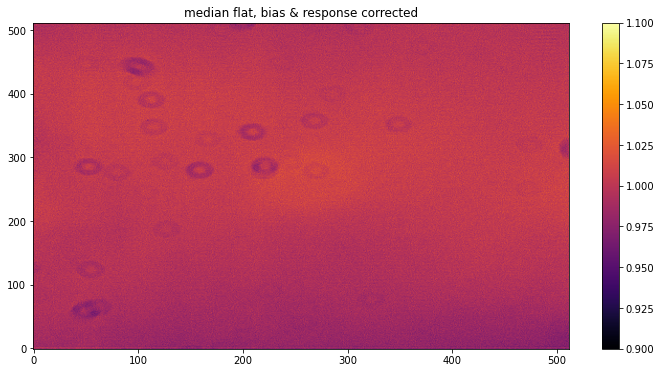

In [34]:
# 07-10-2022 flats
flat, ilum = kosmos.flatcombine(flatfiles, bias=bias, trim=None)

print(ilum.shape) # this is the indicies that are illuminated
print(flat.shape)
print(flat.unit)

if DISPLAY:
    plt.figure(figsize=(12,6))
    plt.imshow(flat, origin='lower', aspect='auto', cmap=plt.cm.inferno)
    plt.clim(.9,1.1)
    plt.title('median flat, bias & response corrected')
    cb = plt.colorbar()

(512,)
(512, 512)
adu / s


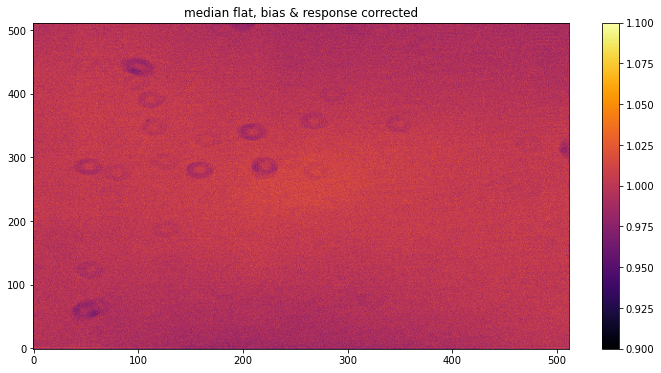

In [37]:
# 07-10-2022 flats
flat_1, ilum_1 = kosmos.flatcombine(flatfiles_1, bias=bias, trim=None)

print(ilum_1.shape) # this is the indicies that are illuminated
print(flat_1.shape)
print(flat_1.unit)

if DISPLAY:
    plt.figure(figsize=(12,6))
    plt.imshow(flat_1, origin='lower', aspect='auto', cmap=plt.cm.inferno)
    plt.clim(.9,1.1)
    plt.title('median flat, bias & response corrected')
    cb = plt.colorbar()

(512,)
(512, 512)
adu / s


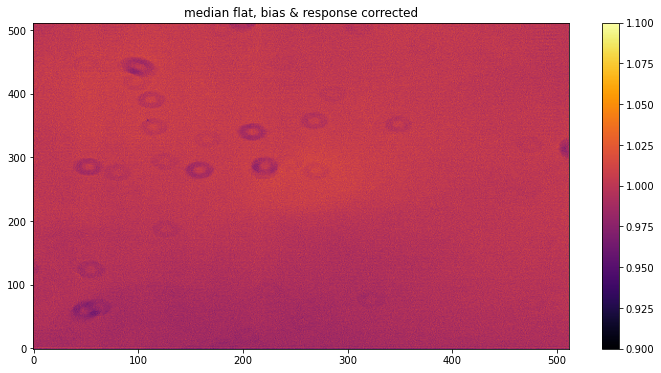

In [38]:
# 07-10-2022 flats
flat_2, ilum_2 = kosmos.flatcombine(flatfiles_2, bias=bias, trim=None)

print(ilum_2.shape) # this is the indicies that are illuminated
print(flat_2.shape)
print(flat_2.unit)

if DISPLAY:
    plt.figure(figsize=(12,6))
    plt.imshow(flat_2, origin='lower', aspect='auto', cmap=plt.cm.inferno)
    plt.clim(.9,1.1)
    plt.title('median flat, bias & response corrected')
    cb = plt.colorbar()

## 3.Image Reduction

(512, 512)
adu / s


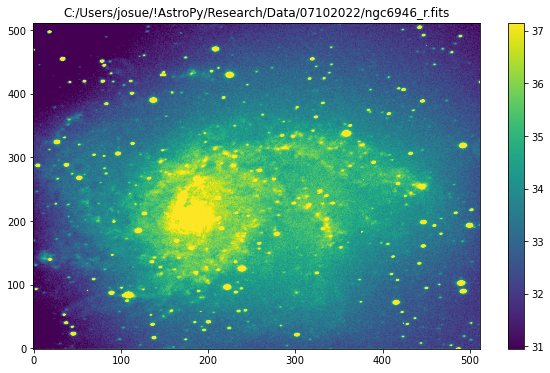

In [49]:
# reduced NGC6946
sci = dir + 'ngc6946_r.fits' 
sciimg = kosmos.proc(sci, bias=bias, ilum=ilum, flat=flat, trim=None)

print(sciimg.shape)
print(sciimg.unit)

if DISPLAY:
    plt.figure(figsize=(10,6))
    plt.imshow(sciimg, origin='lower', aspect='auto')
    plt.clim(np.percentile(sciimg, (5, 98)))
    cb = plt.colorbar()
    plt.title(sci)

(512, 512)
adu / s


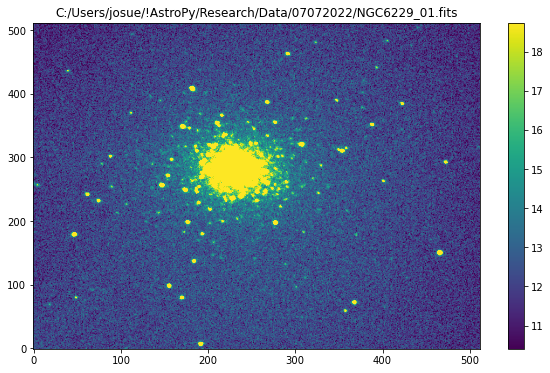

In [58]:
# reduced NGC6946
sci = dir_2 + 'NGC6229_01.fits' 
sciimg = kosmos.proc(sci, bias=bias, ilum=ilum, flat=flat_1, trim=None)

print(sciimg.shape)
print(sciimg.unit)

if DISPLAY:
    plt.figure(figsize=(10,6))
    plt.imshow(sciimg, origin='lower', aspect='auto')
    plt.clim(np.percentile(sciimg, (5, 98)))
    cb = plt.colorbar()
    plt.title(sci)